In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
import os

In [2]:
output_files = list(filter(lambda f: f.endswith('.csv'), os.listdir(".")))
agents = list({file.split("_")[1] for file in output_files})
layouts = list({file.split("_")[2].split(".")[0] for file in output_files})

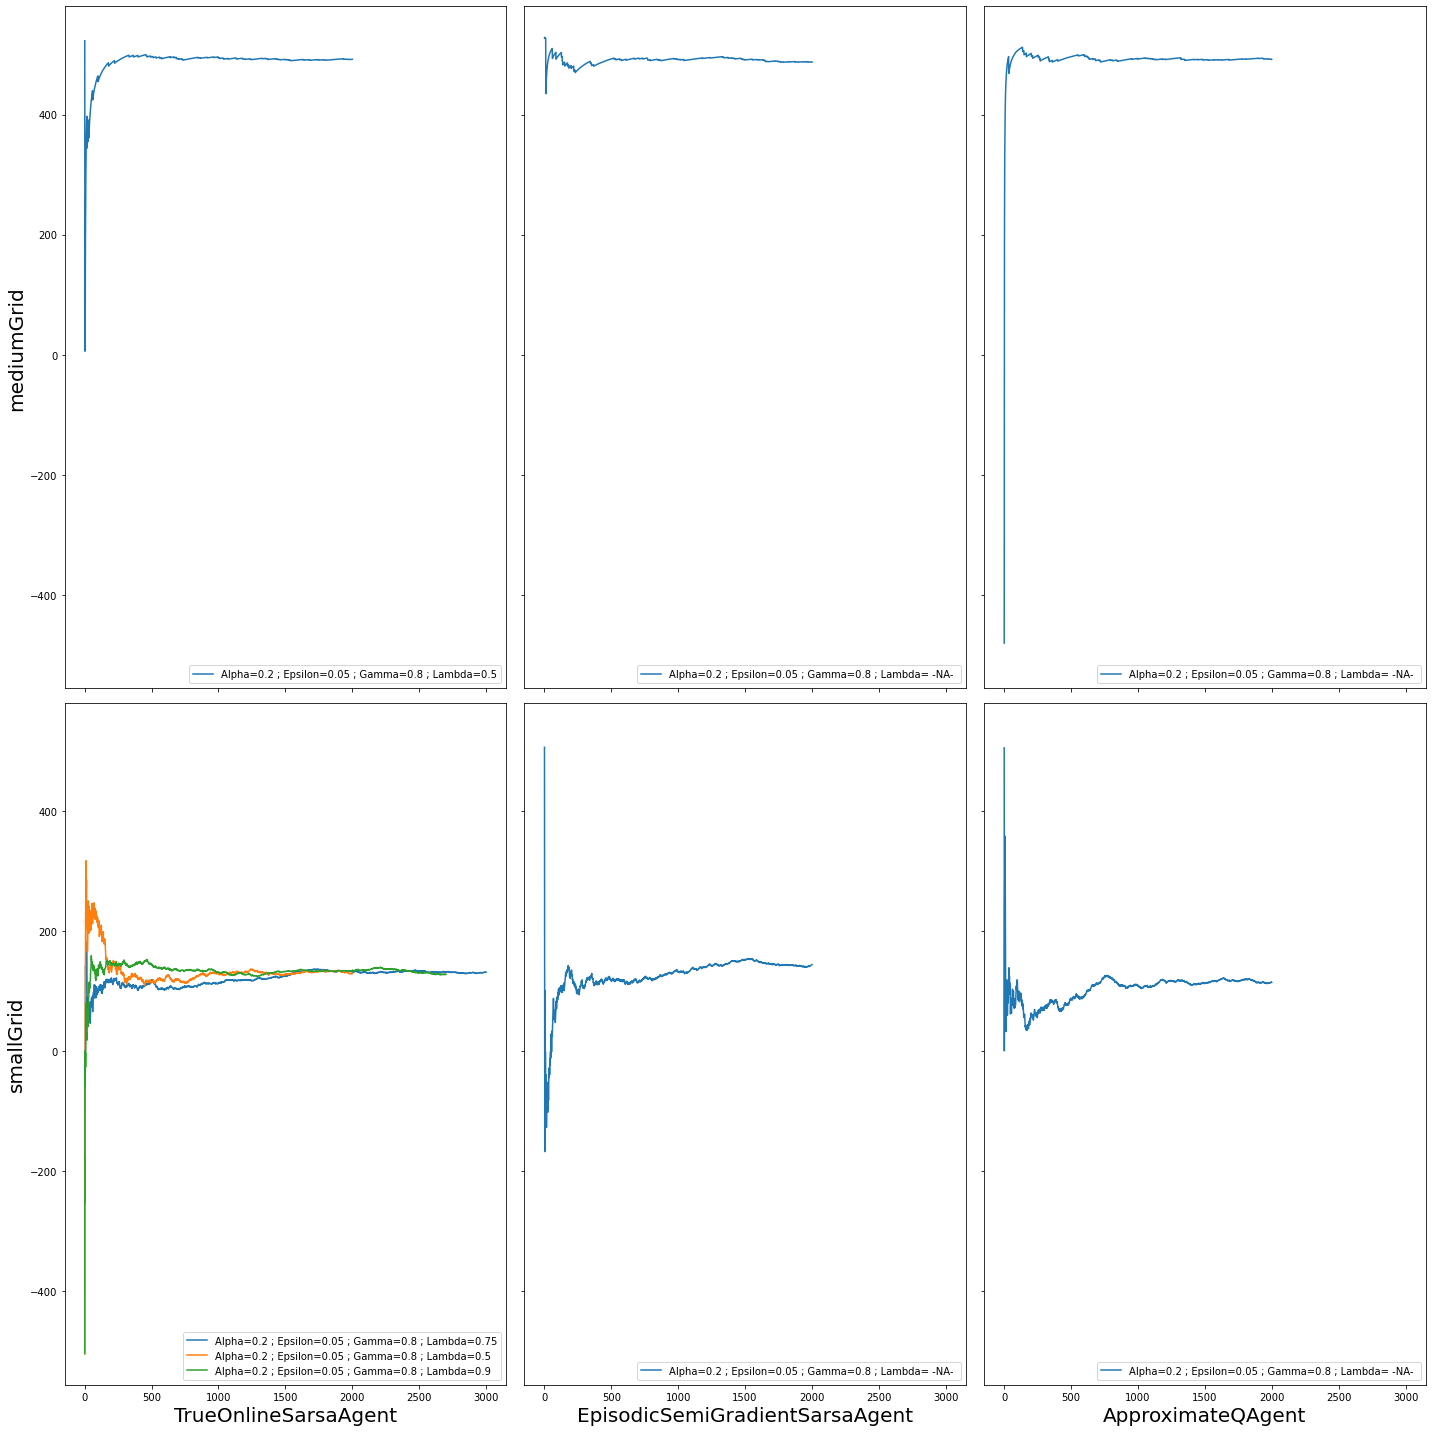

In [5]:
fig, axes2d = plt.subplots(nrows=len(layouts), ncols=len(agents), sharex=True, sharey=True, figsize=(20,20))

for i, row in enumerate(axes2d):
    for j, cell in enumerate(row): 
        #print("\n\n")
        #print(i,j)
        filename = [file for file in output_files if agents[j] in file and layouts[i] in file]
        if len(filename)>0:
            #print(filename[0])
            
            raw_data = np.genfromtxt(filename[0], delimiter=",", names=True)
            data = raw_data.view((float, len(raw_data.dtype.names)))
            #print(raw_data)
            
            lambda_exists = True in np.isnan(data[:,6])
            
            if not lambda_exists:
                param_combos = np.vstack(tuple({tuple(e) for e in data[:,[3,4,5,6]]}))
            else:
                param_combos = np.vstack(tuple({tuple(e) for e in data[:,[3,4,5]]}))                
            #print(param_combos)

            for each in param_combos:
                #print(each[0],each[1],each[2],each[3])
                label = "Alpha=" + str(each[0]) + " ; Epsilon=" + str(each[1]) + " ; Gamma=" + str(each[2]) 
                
                if not lambda_exists:
                    label += " ; Lambda=" + str(each[3])
                else:
                    label += " ; Lambda= -NA- "
                    
                if not lambda_exists:                
                    plot_data = data[(data[:,3] == each[0]) & (data[:,4] == each[1]) & (data[:,5] == each[2]) & (data[:,6] == each[3])][:,[0,1]]
                else:
                    plot_data = data[(data[:,3] == each[0]) & (data[:,4] == each[1]) & (data[:,5] == each[2])][:,[0,1]]
                #print(plot_data)

                avg_plot_data = npi.group_by(plot_data[:, 0]).mean(plot_data)[1]
                #print(avg_plot_data[:,1])

                x_data = avg_plot_data[:,0]
                y_data = avg_plot_data[:,1]

                cell.plot(x_data, y_data, label=label)
                cell.legend(loc='lower right')

                if i == len(axes2d) - 1:
                    cell.set_xlabel(agents[j],fontsize=20)
                if j == 0:
                    cell.set_ylabel(layouts[i],fontsize=20)
                                    
fig.tight_layout()

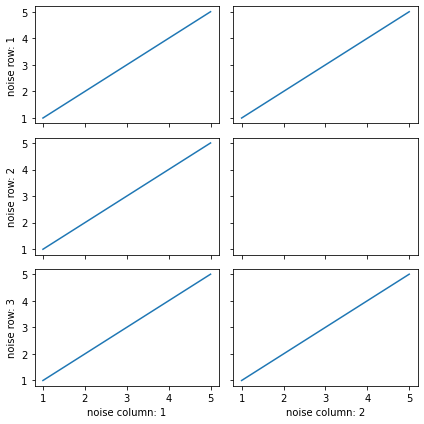

In [33]:
fig, axes2d = plt.subplots(nrows=num_agents, ncols=num_layouts,
                           sharex=True, sharey=True,
                           figsize=(6,6))

for i, row in enumerate(axes2d):
    for j, cell in enumerate(row):
        if i==1 and j==1:
            continue
        #cell.imshow(np.random.rand(32,32))
        cell.plot([1,2,3,4,5],[1,2,3,4,5])
        if i == len(axes2d) - 1:
            cell.set_xlabel("noise column: {0:d}".format(j + 1))
        if j == 0:
            cell.set_ylabel("noise row: {0:d}".format(i + 1))

plt.tight_layout()

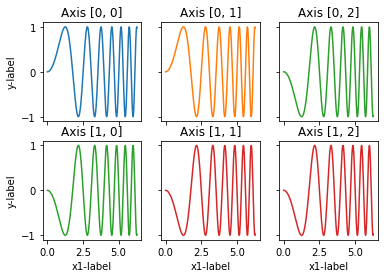

In [51]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')
axs[0, 2].plot(x, -y, 'tab:green')
axs[0, 2].set_title('Axis [0, 2]')
axs[1, 2].plot(x, -y, 'tab:red')
axs[1, 2].set_title('Axis [1, 2]')

for ax in axs.flat:
    ax.set(xlabel='x1-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()